# 1. 데이터 불러오기

In [80]:
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium


## 5) 파생변수 생성

## 전처리 데이터 저장

In [81]:
df2 = pd.read_csv(
    "./data/따릉이_월별병보_전처리_데이터_(25_7)12.csv"
)
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동 거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909
3,202507,102,102. 망원역 1번출구 앞,일일권,O,50대,4,169.09,1.46,6287.07,100,1571.767500,25.000000
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9,1820.250000,9.000000


In [82]:
#건당 이동거리, 건당 이용시간의 히스토 그램
df2["건당 이동 거리(M)"] = df2["이동거리(M)"] /df2["이용건수"] 
df2["건당 이용시간(분)"] = df2["이용시간(분)"] / df2["이용건수"]

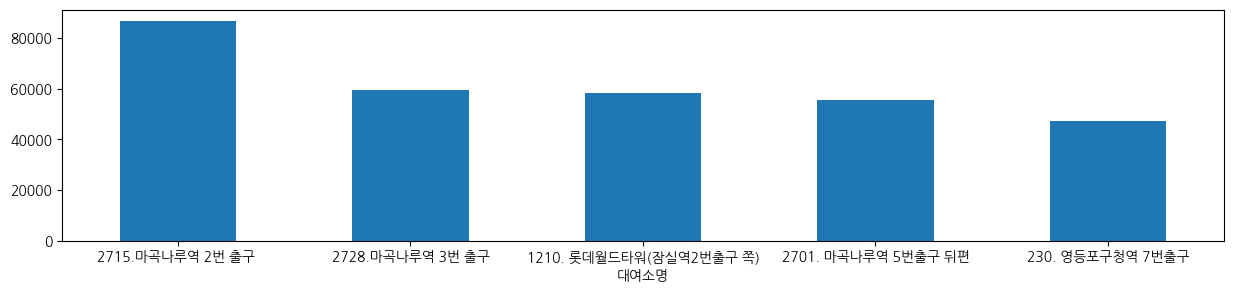

In [83]:
#df2["대여소명"].value_counts().sort_values(ascending=True).head(10)
loc_df2_sum = df2.groupby("대여소명")["이용건수"].sum().sort_values(ascending=False).head(5)
#print(loc_df2_sum)
plt.figure(figsize=(15,3))
loc_df2_sum.plot(kind="bar")
plt.title="사람들이 가장 많이 찾는 이용소"
plt.ylabel="이용건수"
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()


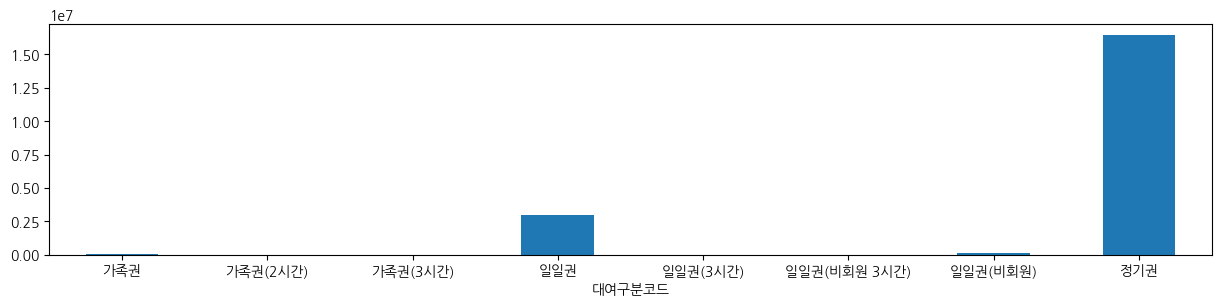

In [4]:
#  대여구분코드, 사람들은 어떤유형의 대여를 하는가
df2["대여구분코드"].value_counts()

group_rent_df = df2.groupby("대여구분코드")["이용건수"].sum()
plt.figure(figsize=(15,3))
group_rent_df.plot(kind="bar")
plt.title="대여 구분별 통계"
plt.ylabel="이용건수"
plt.xticks(rotation=0)
plt.show()

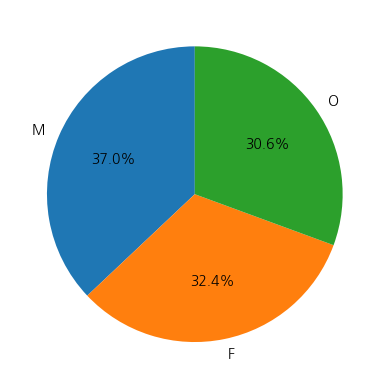

In [84]:
# 성별, 은 어떻게 이루어져 있는가
import koreanize_matplotlib
sex_Per = df2["성별"].value_counts()

plt.pie(
    sex_Per,
    labels=sex_Per.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title ="성별 비율"
plt.show()

In [ ]:
# 연령대, 어떻게 이루어져 있는가

In [ ]:
# 건당 이동거리 분포는?

## 2) 그룹별로 특징 파악하기

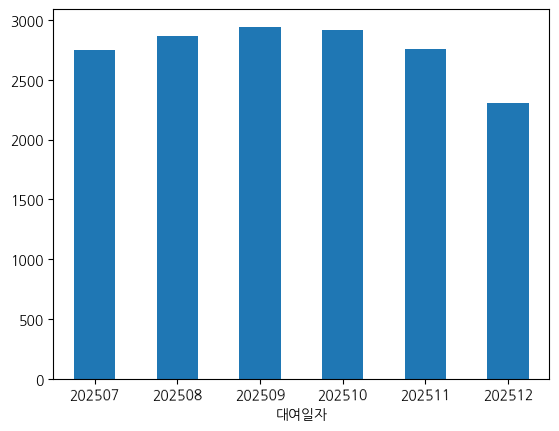

In [27]:
# 월별로 이동거리에 차이가 있는가
m_dist_sum = df2.groupby("대여일자")["건당 이동 거리(M)"].mean()
m_dist_sum.plot(kind="bar")
plt.title="대여일자별 평균 이동거리"
plt.ylabel="평균 이동거리"
plt.xticks(rotation=1) # x축 라벨 회전
plt.show()

In [ ]:
df2["대여소명"].value_counts().head(10)

대여소명
583. 청계천 생태교실 앞            327
502. 자양(뚝섬한강공원)역 1번출구 앞    325
186. 월드컵공원                 322
2622. 올림픽공원역 3번출구          321
4217. 한강공원 망원나들목           320
272. 당산육갑문                 319
419. 홈플러스 마포점 앞            318
420. 서울시 공공자전거 상암센터        315
3511. 응봉역 1번출구             313
780.신정교 하부                 313
Name: count, dtype: int64

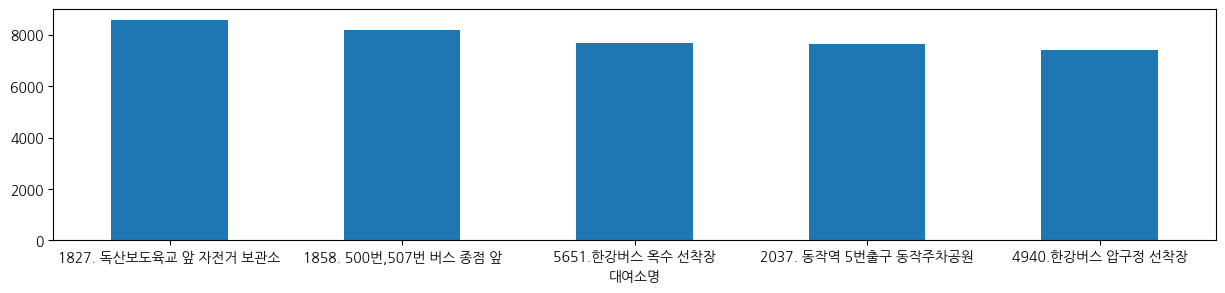

In [29]:
# 대여소별로 이동거리에 차이가 있는가
m_dist_sum = df2.groupby("대여소명")["건당 이동 거리(M)"].mean().sort_values(ascending=False).head()
#.head()# sort_values(by=["건당 이동 거리(M)"],ascending=False)
plt.figure(figsize=(15,3))
m_dist_sum.plot(kind="bar")
plt.title="대여소별 평균 이동거리"
plt.ylabel="평균 이동거리"
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()

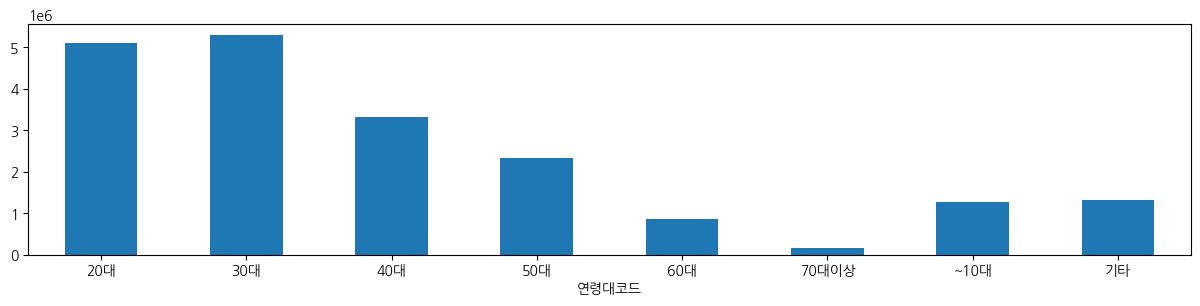

In [31]:
# 연령대 별로 이용거리에 차이가 있는가

m_use_sum = df2.groupby("연령대코드")["이용건수"].sum()

plt.figure(figsize=(15,3))
m_use_sum.plot(kind="bar")
plt.title="연령대별 이용건수"
plt.ylabel="이용건수"
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()

In [ ]:
df2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동 거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909
3,202507,102,102. 망원역 1번출구 앞,일일권,O,50대,4,169.09,1.46,6287.07,100,1571.767500,25.000000
4,202507,102,102. 망원역 1번출구 앞,일일권,O,60대,1,69.20,0.42,1820.25,9,1820.250000,9.000000


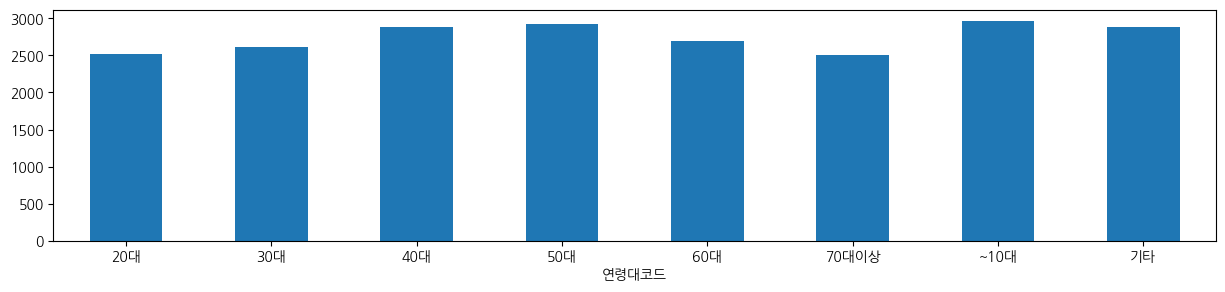

In [32]:
# 연령별 이용 건수
m_dist_sum = df2.groupby("연령대코드")["건당 이동 거리(M)"].mean()
plt.figure(figsize=(15,3))
m_dist_sum.plot(kind="bar")
plt.title="연령대별 평이용건수"
plt.ylabel="이용건수"
plt.xticks(rotation=0) # x축 라벨 회전
plt.show()

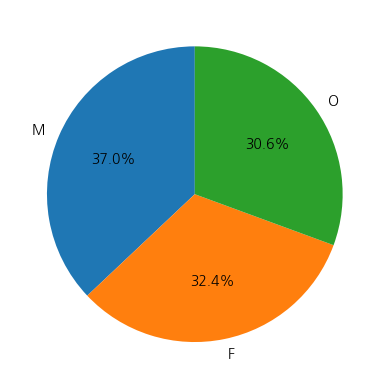

In [33]:
# 성별로 이용거리에 차이가 있는가
ch_counts = df2["성별"].value_counts()

plt.pie(
    ch_counts,
    labels=ch_counts.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title="성별 비율"
plt.show()

## 3) 변수 별 관계 파악

In [15]:
# 연령대 X 성별 분포
pivot_table1 = df2.pivot_table(
    values="건당 이동 거리(M)",
    index="연령대코드",
    columns="성별",
    aggfunc="mean"
)


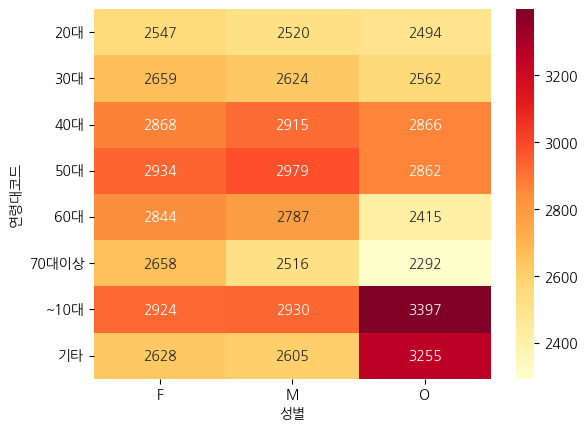

In [34]:
sns.heatmap(
    pivot_table1,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title="연령대 × 성별 평균 이동거리"
plt.show()

In [17]:
# 대여일자 X 연령대
pivot_table2 = df2.pivot_table(
    values="건당 이동 거리(M)",
    index="대여일자",
    columns="연령대코드",
    aggfunc="mean"
)

pivot_table2

연령대코드,20대,30대,40대,50대,60대,70대이상,~10대,기타
대여일자,,,,,,,,
202507,2560.922272,2588.076438,2849.336382,2875.555982,2632.892106,2448.361409,2944.946300,2910.115637
202508,2643.456828,2700.960030,2979.282390,3020.436965,2734.547603,2505.781111,3125.748838,3001.586632
202509,2701.553589,2809.331524,3090.978242,3097.061930,2829.337807,2675.184508,3039.859265,3103.037744
202510,2568.083811,2733.232429,3028.954752,3119.656623,2908.874682,2588.080964,3187.558345,3009.947378
202511,2525.212136,2660.498759,2903.025939,2920.440591,2658.752998,2488.415217,2896.923564,2828.374210
202512,2111.606345,2173.117934,2395.640900,2458.867265,2310.547739,2220.096798,2476.214386,2376.165508


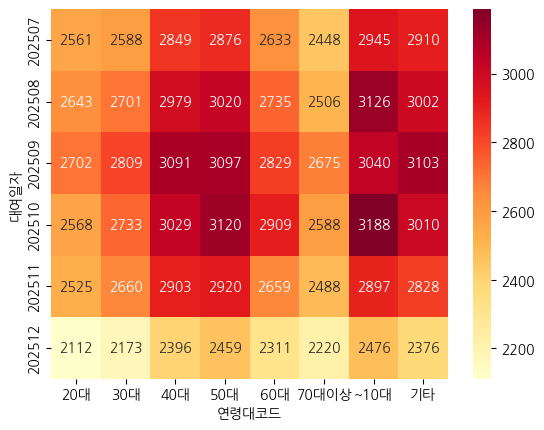

In [35]:
sns.heatmap(
    pivot_table2,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)
plt.title="연령대 × 대여일자 평균 이동거리"
plt.show()

In [ ]:
# 대여소 X 연령대

# 4. 지도 시각화 실습

In [ ]:
df2.head(3)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),건당 이동 거리(M),건당 이용시간(분)
0,202507,102,102. 망원역 1번출구 앞,일일권,O,20대,68,5353.58,51.93,224057.74,1849,3294.966765,27.191176
1,202507,102,102. 망원역 1번출구 앞,일일권,O,30대,65,6345.95,54.21,233558.04,1773,3593.200615,27.276923
2,202507,102,102. 망원역 1번출구 앞,일일권,O,40대,11,378.59,3.54,15314.12,122,1392.192727,11.090909


## 1) 대여소 정보 불러오기

In [85]:
loc_df = pd.read_csv(
    "./data/공공자전거 대여소 정보.csv"
)
loc_df.head()

,STA_LOC,RENT_ID,RENT_NO,RENT_NM,RENT_ID_NM,HOLD_NUM,STA_ADD1,STA_ADD2,STA_LAT,STA_LONG,START_INDEX,END_INDEX,RNUM
0,마포구,ST-10,108,서교동 사거리,108. 서교동 사거리,12.0,서울특별시 마포구 양화로 93,427,37.552746,126.918617,0,0,1
1,광진구,ST-100,503,더샵스타시티 C동 앞,503. 더샵스타시티 C동 앞,15.0,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,0,0,2
2,양천구,ST-1000,729,서부식자재마트 건너편,729. 서부식자재마트 건너편,10.0,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,0,0,3
3,양천구,ST-1002,731,서울시 도로환경관리센터,731. 서울시 도로환경관리센터,10.0,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,0,0,4
4,양천구,ST-1003,732,신월중학교,732. 신월중학교,10.0,서울특별시 양천구 화곡로 59,신월동 이마트,37.539551,126.828300,0,0,5


In [ ]:
# 어떤것을 가지고 올것인가
# loc_df["RENT_ID_NM"] , loc_df["STA_LAT"],loc_df["STA_LONG"]

In [86]:
# 어떤 데이터를 지도에 그릴 것인가?
# 대여소별로 건당 이동 거리(M) 0 2 그룹별요약
loc_dis_sum_5 = df2.groupby("대여소명")["건당 이동 거리(M)"].mean().sort_values(ascending=False).head()
loc_dis_sum_5


대여소명
1827. 독산보도육교 앞 자전거 보관소     8558.437961
1858. 500번,507번 버스 종점 앞    8193.087349
5651.한강버스 옥수 선착장           7683.493071
2037. 동작역 5번출구 동작주차공원      7654.498967
4940.한강버스 압구정 선착장          7395.968325
Name: 건당 이동 거리(M), dtype: float64

In [87]:
# 필요한 열만 추출 RENT_ID_NM,STA_LAT,STA_LONG

loc_df[["RENT_ID_NM","STA_LAT","STA_LONG"]].head(3)

,RENT_ID_NM,STA_LAT,STA_LONG
0,108. 서교동 사거리,37.552746,126.918617
1,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729. 서부식자재마트 건너편,37.510380,126.866798


In [88]:
# 반복문을 통해서 대여소명, 평균 건당 이동 거리(M),위도, 경도 출력
# 반복변수 loc

for loc in loc_dis_sum_5.values : 
    print(loc)

8558.437960748619
8193.0873489451
7683.493070511286
7654.498967120714
7395.968325458602


In [91]:
#loc_df에서 RENT_ID_NM이 loc인 STA_LOC,STA_LONG를 출력
#loc_df.loc[]
for loc in loc_dis_sum_5.index : 
    print("loc:",loc)
    tem = loc_df.loc[loc_df["RENT_ID_NM"]==loc,["STA_LAT","STA_LONG"]]
    lat = loc_df.loc[loc_df["RENT_ID_NM"]==loc,"STA_LAT"].values[0]
    long = loc_df.loc[loc_df["RENT_ID_NM"]==loc,"STA_LONG"].values[0]
    print(lat)
    print("="*40)


loc: 1827. 독산보도육교 앞 자전거 보관소
37.45672607
loc: 1858. 500번,507번 버스 종점 앞
37.43727112
loc: 5651.한강버스 옥수 선착장
37.53970718
loc: 2037. 동작역 5번출구 동작주차공원
37.50318909
loc: 4940.한강버스 압구정 선착장
37.52643204


## 2) 지도 그려보기

In [55]:
# uv add folium
import folium
center = [37.5057138,127.1070689]
map = folium.Map(location=center,zoom_start=13)
map

In [62]:
folium.Marker(
    location=center,
    icon=folium.Icon(color="red",icon="off"),
    popup="서울"
).add_to(map)
map
#지도에 Marker로 표시하고싶을때는 location과 popup에 넣을 데이터 필요

In [92]:
#loc_df에서 RENT_ID_NM이 loc인 STA_LOC,STA_LONG를 출력
#loc_df.loc[]
for loc in loc_dis_sum_5.index : 
    print("loc:",loc)
    tem = loc_df.loc[loc_df["RENT_ID_NM"]==loc,["STA_LAT","STA_LONG"]]
    lat = loc_df.loc[loc_df["RENT_ID_NM"]==loc,"STA_LAT"].values[0]
    long = loc_df.loc[loc_df["RENT_ID_NM"]==loc,"STA_LONG"].values[0]
    print(lat)

    #지도 그리기
    folium.Marker(
        location=[lat,long],
        icon=folium.Icon(color="red",icon="off"),
        popup=loc
    ).add_to(map)
    
    #print("="*40)

loc: 1827. 독산보도육교 앞 자전거 보관소
37.45672607
loc: 1858. 500번,507번 버스 종점 앞
37.43727112
loc: 5651.한강버스 옥수 선착장
37.53970718
loc: 2037. 동작역 5번출구 동작주차공원
37.50318909
loc: 4940.한강버스 압구정 선착장
37.52643204


In [60]:
map

## 2) 통합하는 방법

In [93]:
loc_dis_sum_5 = loc_dis_sum_5.reset_index()
print(loc_dis_sum_5)

                      대여소명  건당 이동 거리(M)
0   1827. 독산보도육교 앞 자전거 보관소  8558.437961
1  1858. 500번,507번 버스 종점 앞  8193.087349
2         5651.한강버스 옥수 선착장  7683.493071
3    2037. 동작역 5번출구 동작주차공원  7654.498967
4        4940.한강버스 압구정 선착장  7395.968325


In [94]:
loc_df_new = loc_df[["RENT_ID_NM","STA_LAT","STA_LONG"]]
loc_df_new.columns = ["대여소명","LAT","LONG"]
loc_df_new.head()

,대여소명,LAT,LONG
0,108. 서교동 사거리,37.552746,126.918617
1,503. 더샵스타시티 C동 앞,37.536667,127.073593
2,729. 서부식자재마트 건너편,37.510380,126.866798
3,731. 서울시 도로환경관리센터,37.529900,126.876541
4,732. 신월중학교,37.539551,126.828300


In [95]:
merge_data = pd.merge(
    left=loc_dis_sum_5, # 데이터1 
    right=loc_df_new,  # 데이터2
    how="left",         # (left,right,inner,outer)
    on = "대여소명"
)

merge_data

,대여소명,건당 이동 거리(M),LAT,LONG
0,1827. 독산보도육교 앞 자전거 보관소,8558.437961,37.456726,126.893066
1,"1858. 500번,507번 버스 종점 앞",8193.087349,37.437271,126.902687
2,5651.한강버스 옥수 선착장,7683.493071,37.539707,127.017899
3,2037. 동작역 5번출구 동작주차공원,7654.498967,37.503189,126.977150
4,4940.한강버스 압구정 선착장,7395.968325,37.526432,127.017204


In [102]:
for idx in range(len(merge_data)) :
    #merge_data에서 idxㅏ 위치에 있는 모든열의 값을 출력해 주세요
    row_data = merge_data.iloc[idx,:].values
    print(row_data)
    loc = row_data[0]
    lat = row_data[-2]
    long = row_data[-1]
    print("-"*+30)

    # 지도 그리기
    folium.Marker(
        location=[lat,long],
        icon=folium.Icon(color="blue",icon="heart"),
        popup=loc
    ).add_to(map)


['1827. 독산보도육교 앞 자전거 보관소' np.float64(8558.437960748619)
 np.float64(37.45672607) np.float64(126.89306641)]
------------------------------
['1858. 500번,507번 버스 종점 앞' np.float64(8193.0873489451)
 np.float64(37.43727112) np.float64(126.90268707)]
------------------------------
['5651.한강버스 옥수 선착장' np.float64(7683.493070511286) np.float64(37.53970718)
 np.float64(127.01789856)]
------------------------------
['2037. 동작역 5번출구 동작주차공원' np.float64(7654.498967120714)
 np.float64(37.50318909) np.float64(126.97714996)]
------------------------------
['4940.한강버스 압구정 선착장' np.float64(7395.968325458602) np.float64(37.52643204)
 np.float64(127.01720428)]
------------------------------


In [103]:
map